In [83]:
import os
os.getcwd()

'/Users/chidam'

In [84]:
import pandas as pd
df=pd.read_csv('/Users/chidam/Desktop/housing_prices_kaggle_train.csv')

In [85]:
#To get an idea on how many columns have null values

df.columns[df.isnull().any()]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [86]:
#Before fixing the null values let us remove the outliers from the dataset

#Removing the four points that are above 4000 sq.ft as they are clearly outliers according to the context
# Although the two points in the top right side make sense as properties that have bigger square feet area cost more, research
# shows that they are outliers too


df[df['GrLivArea']>4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [87]:
df[(df['GrLivArea']>3600) & (df['GrLivArea']<4000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


In [88]:
df.drop(df.index[[523,691,1182,1298, 1169]], inplace=True)
df=df.reset_index(drop=True)#here drop=True means to drop the alreading existing index column

In [89]:
#Ought to express months in words
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x: calendar.month_abbr[x])







In [90]:
#For now we are going to consider only these categorical variables: 'Neighborhood' and 'Electrical'. But 'Electrical' has
#null values so we gotta fill in those missing values and also convert the categorical variables into numerical values


df['Electrical'].describe()





count      1454
unique        5
top       SBrkr
freq       1329
Name: Electrical, dtype: object

In [91]:
df['Electrical'].value_counts(dropna=False)

SBrkr    1329
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [92]:
#Since there is only one NaN value in the 'Electrical' column I am replacing it with the majority value 'SBrkr'
df.Electrical = df.Electrical.fillna('SBrkr')

In [93]:
#To find the age of a building by subtracting 'YearBuilt' from 'YrSold' 
df['Age_building']=(df['YrSold']-df['YearBuilt'])

In [94]:
#To find the number of years since a building had been remodeled before the time it was sold by subtracting 'YearRemodAdd' from
#'YrSold'
df['Since_remodeled']=(df['YrSold']-df['YearRemodAdd'])


In [95]:
df['Condition1'].value_counts()

Norm      1257
Feedr       80
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [ ]:
To inlcude: MasVnrType, LotShape, HouseStyle, SaleType, GarageArea, GarageType, Age_garage, 'PavedDrive','CentralAir',
'Heating',BsmtQual, BsmtFullBath, Utilities, 2ndFlrSF, 1stFlrSF, WoodDeckSF, EnclosedPorch, FullBath, Condition1

Categorical columns:
MasVnrType: NaN : FE
LotShape: FE
HouseStyle: FE
SaleType: FE
GarageType: FE: NaN
'PavedDrive' : yes/no (0 and 1)(partial: FE)
'CentralAir': yes/no (0 and 1)
'Heating': FE
BsmtQual: NaN : FE
BsmtFullBath: FE 
Utilities: FE

    




In [96]:
#Filling in the missing values in 'GarageYrBlt'
df.GarageYrBlt = df.GarageYrBlt.fillna(df['GarageYrBlt'].median())

In [97]:
#GarageYrBlt Vs. SalePrice It is possible to get the info on whether the garage is a old one or recently built and thereby
#check how that had affected the SalePrice

#To find the age of a building by subtracting 'YearBuilt' from 'YrSold' 
df['Age_garage']=(df['YrSold']-df['GarageYrBlt'])




In [98]:
#Let's drop the following columns from the dataframe
df=df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis=1)

In [99]:
#To get value_counts() of 'MasVnrType'

df['MasVnrType'].value_counts(dropna=False)
        
        

None       863
BrkFace    443
Stone      126
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [100]:
#Filling in the missing values in MasVnrType. I decided to replace nan values with 'Stone' as it emerges as the popular choice
#of home buyers (this is the trend in the current real estate market though)

df.MasVnrType = df.MasVnrType.fillna('Stone')

In [101]:
#GarageType: has NaN values

df['GarageType'].value_counts(dropna=False)

Attchd     866
Detchd     387
BuiltIn     87
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [102]:
#Filling in the missing values in GarageType with BuiltIn as it is a popular choice but there are not many values from 
#that category
df.GarageType = df.GarageType.fillna('BuiltIn')

In [103]:
#BsmtQual

df['BsmtQual'].value_counts(dropna=False)

TA     649
Gd     618
Ex     116
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [104]:
#Filling in the missing values in BsmtQual with 'Ex' as the SalePrice was higher for 'Ex' compared to that of other categories
df.BsmtQual = df.BsmtQual.fillna('Ex')

In [105]:
df['PavedDrive'].value_counts(dropna=False)

Y    1335
N      90
P      30
Name: PavedDrive, dtype: int64

In [106]:
#Converting the categorical values in 'PavedDrive' into numerical

df.loc[df['PavedDrive']=='Y', 'PavedDrive']=1
df.loc[df['PavedDrive']=='N', 'PavedDrive']=0
df.loc[df['PavedDrive']=='P', 'PavedDrive']=(len(df.loc[df['PavedDrive']=='P']))/len(df)





In [107]:
##Converting the categorical values in 'CentralAir' into numerical

df.loc[df['CentralAir']=='Y', 'CentralAir']=1
df.loc[df['CentralAir']=='N', 'CentralAir']=0

In [108]:
# 'Heating': FE

# Utilities: FE

    



df['Utilities'].value_counts(dropna=False)

AllPub    1454
NoSeWa       1
Name: Utilities, dtype: int64

In [109]:
df['Foundation'].value_counts()

PConc     642
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [110]:
#To convert the categorical values in the column: 'Electrical
def convert_categorical(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if x[ele] in y:
            x[ele]=y[x[ele]]

            
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()
    
convert_categorical(df, df['Electrical'].tolist(), dict(df['Electrical'].value_counts()/len(df)), 'Electrical')
convert_categorical(df, df['Neighborhood'].tolist(), dict(df['Neighborhood'].value_counts()/len(df)), 'Neighborhood')
convert_categorical(df, df['MoSold'].tolist(), dict(df['MoSold'].value_counts()/len(df)), 'MoSold')
convert_categorical(df, df['MasVnrType'].tolist(), dict(df['MasVnrType'].value_counts()/len(df)), 'MasVnrType')
convert_categorical(df, df['LotShape'].tolist(), dict(df['LotShape'].value_counts()/len(df)), 'LotShape')

convert_categorical(df, df['GarageType'].tolist(), dict(df['GarageType'].value_counts()/len(df)), 'GarageType')

convert_categorical(df, df['BsmtQual'].tolist(), dict(df['BsmtQual'].value_counts()/len(df)), 'BsmtQual')
convert_categorical(df, df['HouseStyle'].tolist(), dict(df['HouseStyle'].value_counts()/len(df)), 'HouseStyle')
convert_categorical(df, df['SaleType'].tolist(), dict(df['SaleType'].value_counts()/len(df)), 'SaleType')
convert_categorical(df, df['Heating'].tolist(), dict(df['Heating'].value_counts()/len(df)), 'Heating')
convert_categorical(df, df['Foundation'].tolist(), dict(df['Foundation'].value_counts()/len(df)), 'Foundation')
convert_categorical(df, df['Utilities'].tolist(), dict(df['Utilities'].value_counts()/len(df)), 'Utilities')








0    0.999313
1    0.999313
2    0.999313
3    0.999313
4    0.999313
Name: Utilities, dtype: float64

In [111]:
#Going to add a negative sign to RRAe, RRNe, and RRNn. The reasoning is that there were fewer number of sales happened in
#those situations and also the SalePrice was relatively on the lower side compared to that of other categories in Condition1

def convert_categorical(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if (x[ele]=='RRNn') or (x[ele]=='RRNe') or (x[ele]=='RRAe'):
            if x[ele] in y:
                x[ele]=-y[x[ele]]
                
        else:
            if x[ele] in y:
                x[ele]=y[x[ele]]
        
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()
    
convert_categorical(df, df['Condition1'].tolist(), dict(df['Condition1'].value_counts()/len(df)), 'Condition1')

0    0.863918
1    0.054983
2    0.863918
3    0.863918
4    0.863918
Name: Condition1, dtype: float64

In [112]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrArea', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [113]:
cols = [col for col in df.columns if col in ['LotArea','TotRmsAbvGrd','HalfBath','FullBath','GarageArea','TotalBsmtSF','GrLivArea','MoSold', 'Neighborhood','Electrical', 'Age_building','Since_remodeled','MasVnrType','LotShape','GarageType','BsmtQual','HouseStyle','Condition1','SaleType','Age_garage','2ndFlrSF', '1stFlrSF', 'WoodDeckSF','SalePrice']]
df4 = df[cols]



In [114]:
df4.columns#24 columns

Index(['LotArea', 'LotShape', 'Neighborhood', 'Condition1', 'HouseStyle',
       'MasVnrType', 'BsmtQual', 'TotalBsmtSF', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       'GarageType', 'GarageArea', 'WoodDeckSF', 'MoSold', 'SaleType',
       'SalePrice', 'Age_building', 'Since_remodeled', 'Age_garage'],
      dtype='object')

In [115]:
#Model Building: First let's build a base model and then we improve the performance of the model


y=df4['SalePrice'].values





In [116]:
df4=df4.drop('SalePrice', axis=1)

X=df4.values






In [137]:
#GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters ={'n_estimators':[100, 150, 200, 250], 'min_samples_split':[2, 3, 4, 5], 'min_samples_leaf':[1, 2, 3], 'max_features':[7, 8, 9, 10]}

In [138]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=42,oob_score=True)




In [139]:
clf_rfr = GridSearchCV(RFR, parameters, cv=10)

In [140]:
clf_rfr.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200, 250], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4, 5], 'max_features': [7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [141]:
clf_rfr.best_params_

{'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [153]:
clf_rfr.best_score_

0.8587640235993983

In [156]:
clf_rfr.error_score

'raise'

In [148]:
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor(n_estimators=250, max_features=8, min_samples_leaf= 1, min_samples_split= 2, random_state=42, oob_score=True)


In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [150]:
rfr_fit=RFR_model.fit(X_train, y_train)

In [151]:
rfr_fit.score(X_test, y_test)#RFR.score returns the coefficient of determination(R^2) of the prediction

#R^2 = how much (what %) of the total variation in y is explained the variation in x?

0.8694102563088952

In [158]:
rfr_fit.oob_score_

0.8521258885611225

In [159]:
rfr_fit.oob_prediction_

array([124829.16666667, 133638.0952381 , 265124.44444444, ...,
       148533.51648352, 149804.21686747, 219392.91489362])

In [160]:
#generalization error using rfr_fit.oob_prediction_ and rfr_fit.predict(X_test)

y_pred=rfr_fit.predict(X_test)


In [161]:
from sklearn.metrics import mean_squared_error
-mean_squared_error(y_test, y_pred)

-719223100.8661373

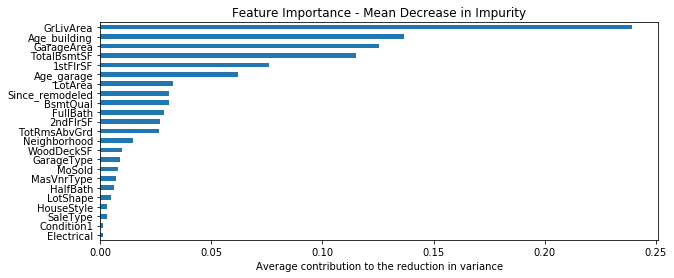

In [152]:
# Plot the importance of features
fs = pd.Series(RFR_model.feature_importances_, index=df4.columns.values)
feature_scores = fs.sort_values()
ax = feature_scores.plot(kind='barh', figsize=(10,4))
ax.set_title("Feature Importance - Mean Decrease in Impurity")
ax.set_xlabel('Average contribution to the reduction in variance');

In [ ]:
from sklearn.metrics import mean_squared_error
neg_mse = lambda y1, y2: -mean_squared_error(y1, y2)

In [163]:
#RFR_without OOB score
from sklearn.ensemble import RandomForestRegressor
RFR_model2 = RandomForestRegressor(n_estimators=250, max_features=8, min_samples_leaf= 1, min_samples_split= 2, random_state=42, oob_score=False)



In [164]:
rfr2_fit=RFR_model2.fit(X_train, y_train)

In [165]:
rfr2_fit.score(X_test, y_test)#oob_score did not make any difference in the R^2 value measurement

0.8694102563088952